<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/Lill_PolaU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2 Project: Flipping Metaphorical Coins

Football is one of the most popular sports in the USA and The Dallas Cowboys are one of the most famous teams in the National Football League (NFL). Established in 1960, the Cowboys represent Texas and many fans around the country. The NFL's season is split into the regular season and the playoff season, with the winners of the playoffs facing off in the Super Bowl, one of the most watched sporting events. Over the years, the Dallas Cowboys have won five super bowls, but their playoff wins have been incosistent, especially in recent decades. We will be analyzing the playoff win percentage of the Dallas Cowboys for the past 30 years.

Let's figure out what the Dallas Cowboy's playoff win percentage is in the NFL.

The following are necessary to run the code:

In [4]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [5]:
import preliz as pz

In [6]:
import numpy as np
import arviz as az
import pymc as pm

We can start by making an assumption. The following plots the uniform distribution.

<Axes: >

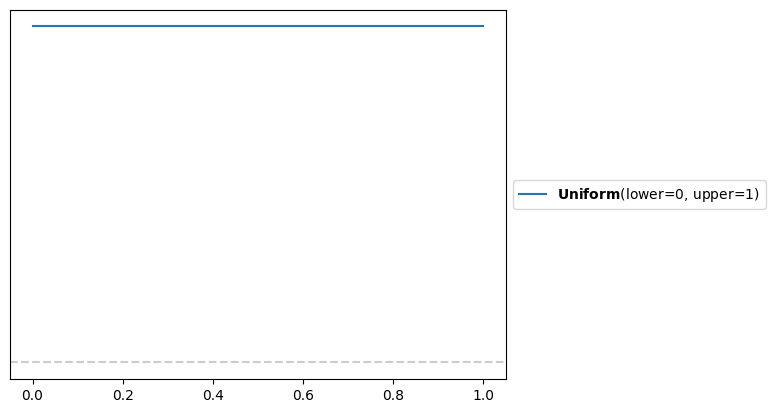

In [7]:
pz.Uniform(0,1).plot_pdf() # plots the uniform distribution

I am assuming that the Dallas Cowboys will have won 30% of their playoff games.
This is due to their previous history of success, but recent reputation of failure. Because this analysis only goes back 30 years - until 1993, I believe their percent of playoff wins will be relatively low.


<Axes: >

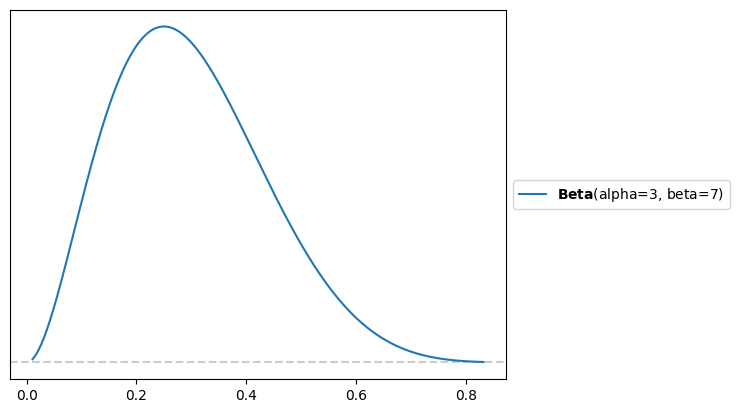

In [8]:
pz.Beta(alpha=3,beta=7).plot_pdf()

This graph represents my assumption as the peak is at 0.3, which is my estimated success rate of the Cowboys. The Beta distribution reflects a bit of uncertainty, as other winning percentages such as 20% or 40% are possibly, though less likely in my opinion.

The Dallas Cowboys played 23 playoff games in the past 30 years. Over the years, they have won 9 of those games, losing 14. This data starts in 1993 (30 years before 2023), since the 2024-25 season has just started and we don't have data yet.

In [9]:
Cowboys_wins=np.array([1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0])

In [10]:
#Cowboy's playoff wins in the past 30 years
Dallas_Wins_30yrs = np.repeat([1,0], repeats = [9,14])

In [11]:
with pm.Model() as Cowboys_wins:
  #same prior from before based on NFL data
  θ = pm.Beta('θ' , alpha = 3. , beta = 7.)
#same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = Dallas_Wins_30yrs)
#sample from the posterior, 2000 for a more prcise picture later
  idata_Cowboys_Wins = pm.sample(2000)

<Axes: title={'center': 'θ'}>

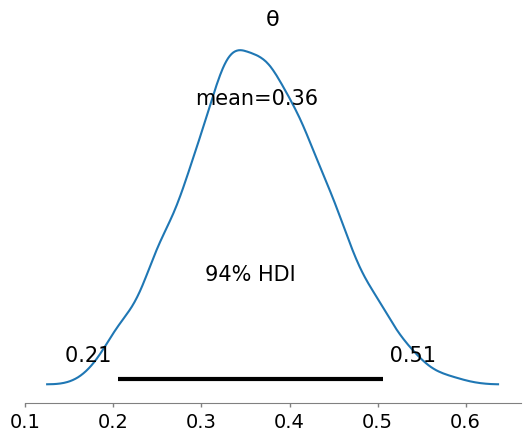

In [12]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_Cowboys_Wins)

This model shows the playoff win percentage peak being at 36%. This data is based on 23 playoff games, 9 wins and 14 losses. The posterior mean (0.36) suggests the most likely playoff percent with probability, considering both the prior and our array data.

Simple algebra would give us a slighty different answer:

9/(9+14) = 0.39

However, our model's mean is 0.36 because of my original uncertainty that the Cowboys would win 30% of their playoff games.

This data and model allow us to analyze playoff wins of the Dallas Cowboys over the past 30 years. I am not shocked by the results, even though they are slightly higher than I expected.